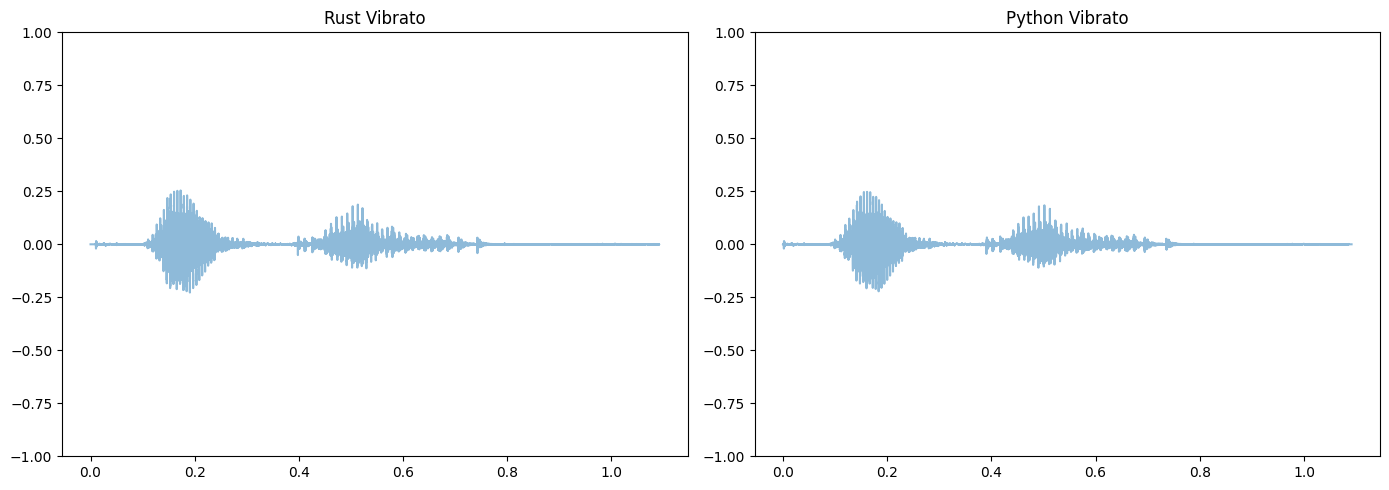

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.io.wavfile import write

def apply_vibrato(y, sr, vibrato_frequency=5, vibrato_depth=0.005):
    """Apply a simple vibrato effect to the audio signal."""
    # Time array at audio sample rate
    t = np.arange(len(y)) / sr
    # Vibrato effect as a sinusoidal modulation of the time indices
    modulation = vibrato_depth * sr * np.sin(2 * np.pi * vibrato_frequency * t)
    # New sample indices
    new_indices = np.arange(len(y)) + modulation
    # Interpolating the audio signal at new indices
    new_audio = np.interp(new_indices, np.arange(len(y)), y)
    return new_audio

def plot_audio_signals(rust, python, sr):

    min_len = min(len(python), len(rust))
    time_axis = np.linspace(0, len(rust) / sr, num=min_len)
    
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(time_axis, rust[:min_len], label="Rust Audio", alpha=0.5)
    plt.title('Rust Vibrato')
    plt.ylim(-1, 1)

    plt.subplot(1, 2, 2)
    plt.plot(time_axis, python[:min_len], label="Python Audio", alpha=0.5)
    plt.title('Python Vibrato')
    plt.ylim(-1, 1)

    plt.tight_layout()
    plt.show()


path_to_audio_file = 'ohyeah.wav'
y, sr = librosa.load(path_to_audio_file, sr=None)


vibrato_audio = apply_vibrato(y, sr, vibrato_frequency=5, vibrato_depth=0.005)

y_rust, sr_rust = librosa.load("ohyeah_s.wav", sr=None)


plot_audio_signals(y_rust, vibrato_audio, sr)


output_path = 'ohyeah_s_py.wav'
write(output_path, sr, (vibrato_audio * 32767).astype(np.int16))


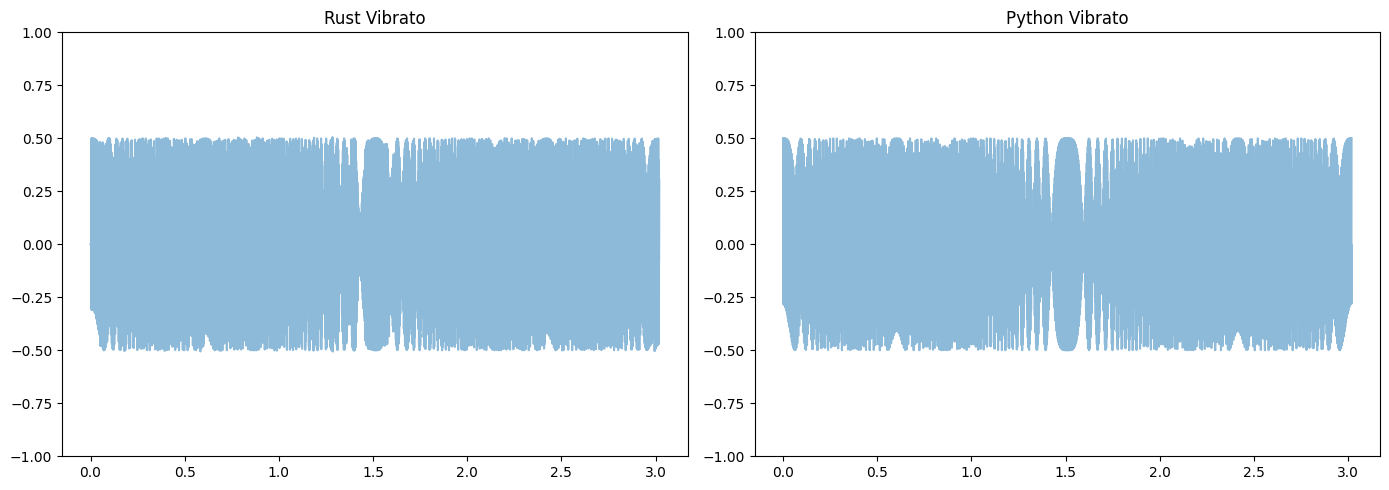

In [21]:
path_to_audio_file = 'sweep.wav'
ysweep, srsweep = librosa.load(path_to_audio_file, sr=None)


vibratosweep_audio = apply_vibrato(ysweep, srsweep, vibrato_frequency=5, vibrato_depth=0.005)

ysweep_rust, srsweep_rust = librosa.load("sweep_v.wav", sr=None)


plot_audio_signals(ysweep_rust, vibratosweep_audio, srsweep)


output_path = 'sweep_v_py.wav'
write(output_path, sr, (vibrato_audio * 32767).astype(np.int16))